In [29]:
import pandas as pd 
import numpy as np
from prophet import Prophet
import datetime
%matplotlib notebook
import matplotlib.pyplot as plt


In [30]:
revenue_df = pd.read_csv('rev.csv', index_col = 0)
revenue_df.head()

,date,rev,discount
0,2019-01-01,8.603315e+05,512860.0
1,2019-01-02,1.494803e+06,864634.0
2,2019-01-03,1.004543e+06,397134.0
3,2019-01-04,1.011044e+06,361481.0
4,2019-01-05,1.025176e+06,408829.0


## Plot the time series of total discounts. So we can find campaign days and exclude anomalies from our model

<IPython.core.display.Javascript object>


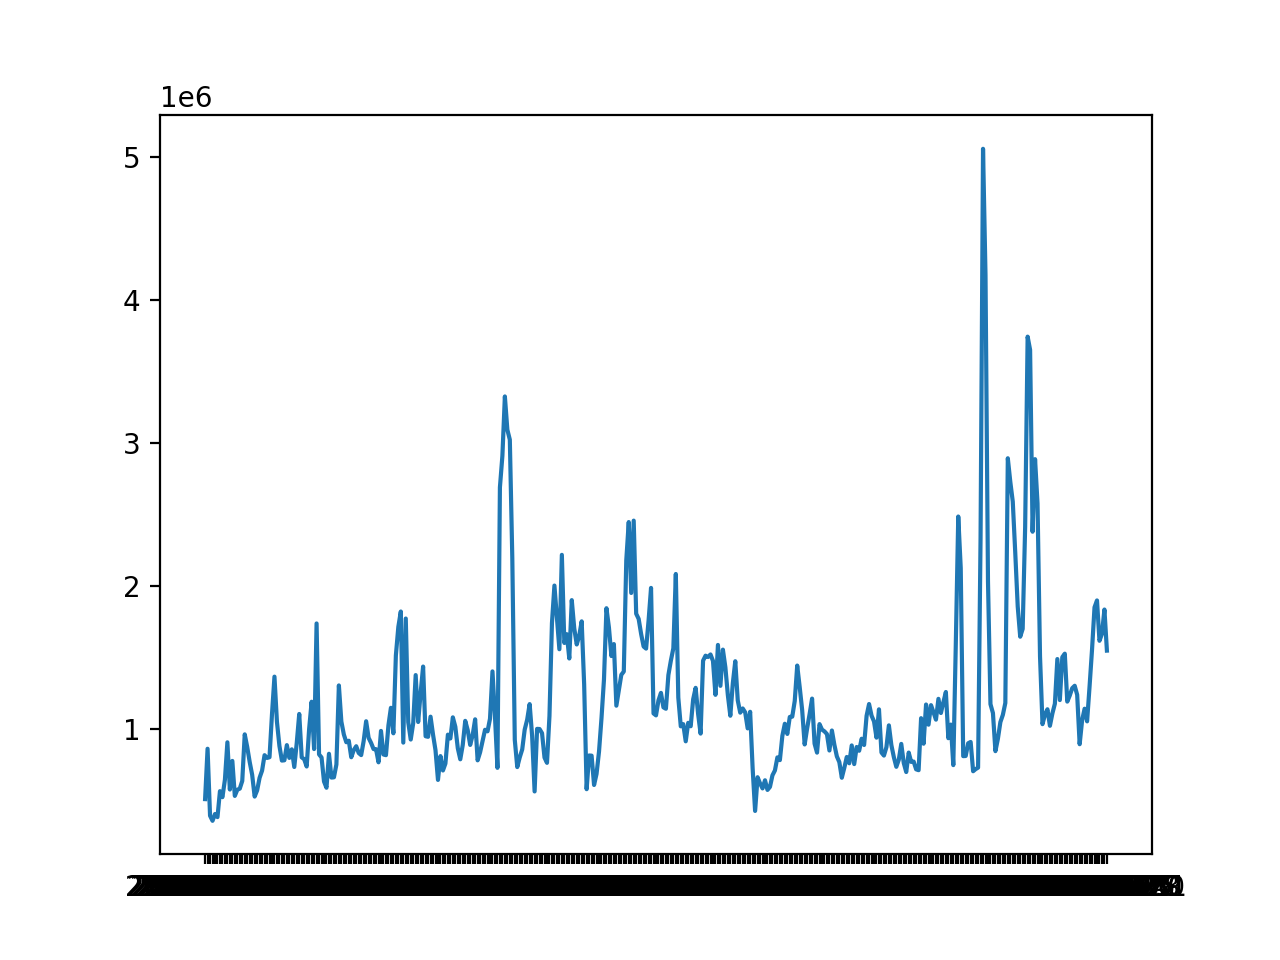

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [31]:
plt.plot(revenue_df['date'], revenue_df['discount'])
revenue_df = revenue_df.drop(columns = ['discount'])

In [33]:
revenue_df = revenue_df.rename(columns = {'date':'ds', 'rev': 'y'})
revenue_df = revenue_df.sort_values(by = 'ds')
revenue_df.head(10)

,ds,y
0,2019-01-01,8.603315e+05
1,2019-01-02,1.494803e+06
2,2019-01-03,1.004543e+06
3,2019-01-04,1.011044e+06
4,2019-01-05,1.025176e+06
5,2019-01-06,9.963863e+05
6,2019-01-07,1.168613e+06
7,2019-01-08,1.094639e+06
8,2019-01-09,1.335641e+06
9,2019-01-10,1.545129e+06


In [34]:

campaign_days = pd.DataFrame({
  'holiday': 'campaign_week',
  'ds': pd.to_datetime([
      '2019-05-01', '2019-11-01', '2019-11-11', '2019-11-22', '2019-11-29'
  ]),
})






In [47]:
forecast = Prophet(changepoint_prior_scale = 0.001, yearly_seasonality = True, holidays = campaign_days)
forecast.fit(revenue_df)

future = forecast.make_future_dataframe(periods = (30))

results = forecast.predict(future)
results[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,1.070009e+06,75096.772599,2.060694e+06
1,2019-01-02,1.180327e+06,172461.162394,2.136157e+06
2,2019-01-03,1.312933e+06,333422.108777,2.277969e+06
3,2019-01-04,1.316438e+06,368042.457359,2.369906e+06
4,2019-01-05,1.330909e+06,405005.129519,2.327765e+06


<IPython.core.display.Javascript object>


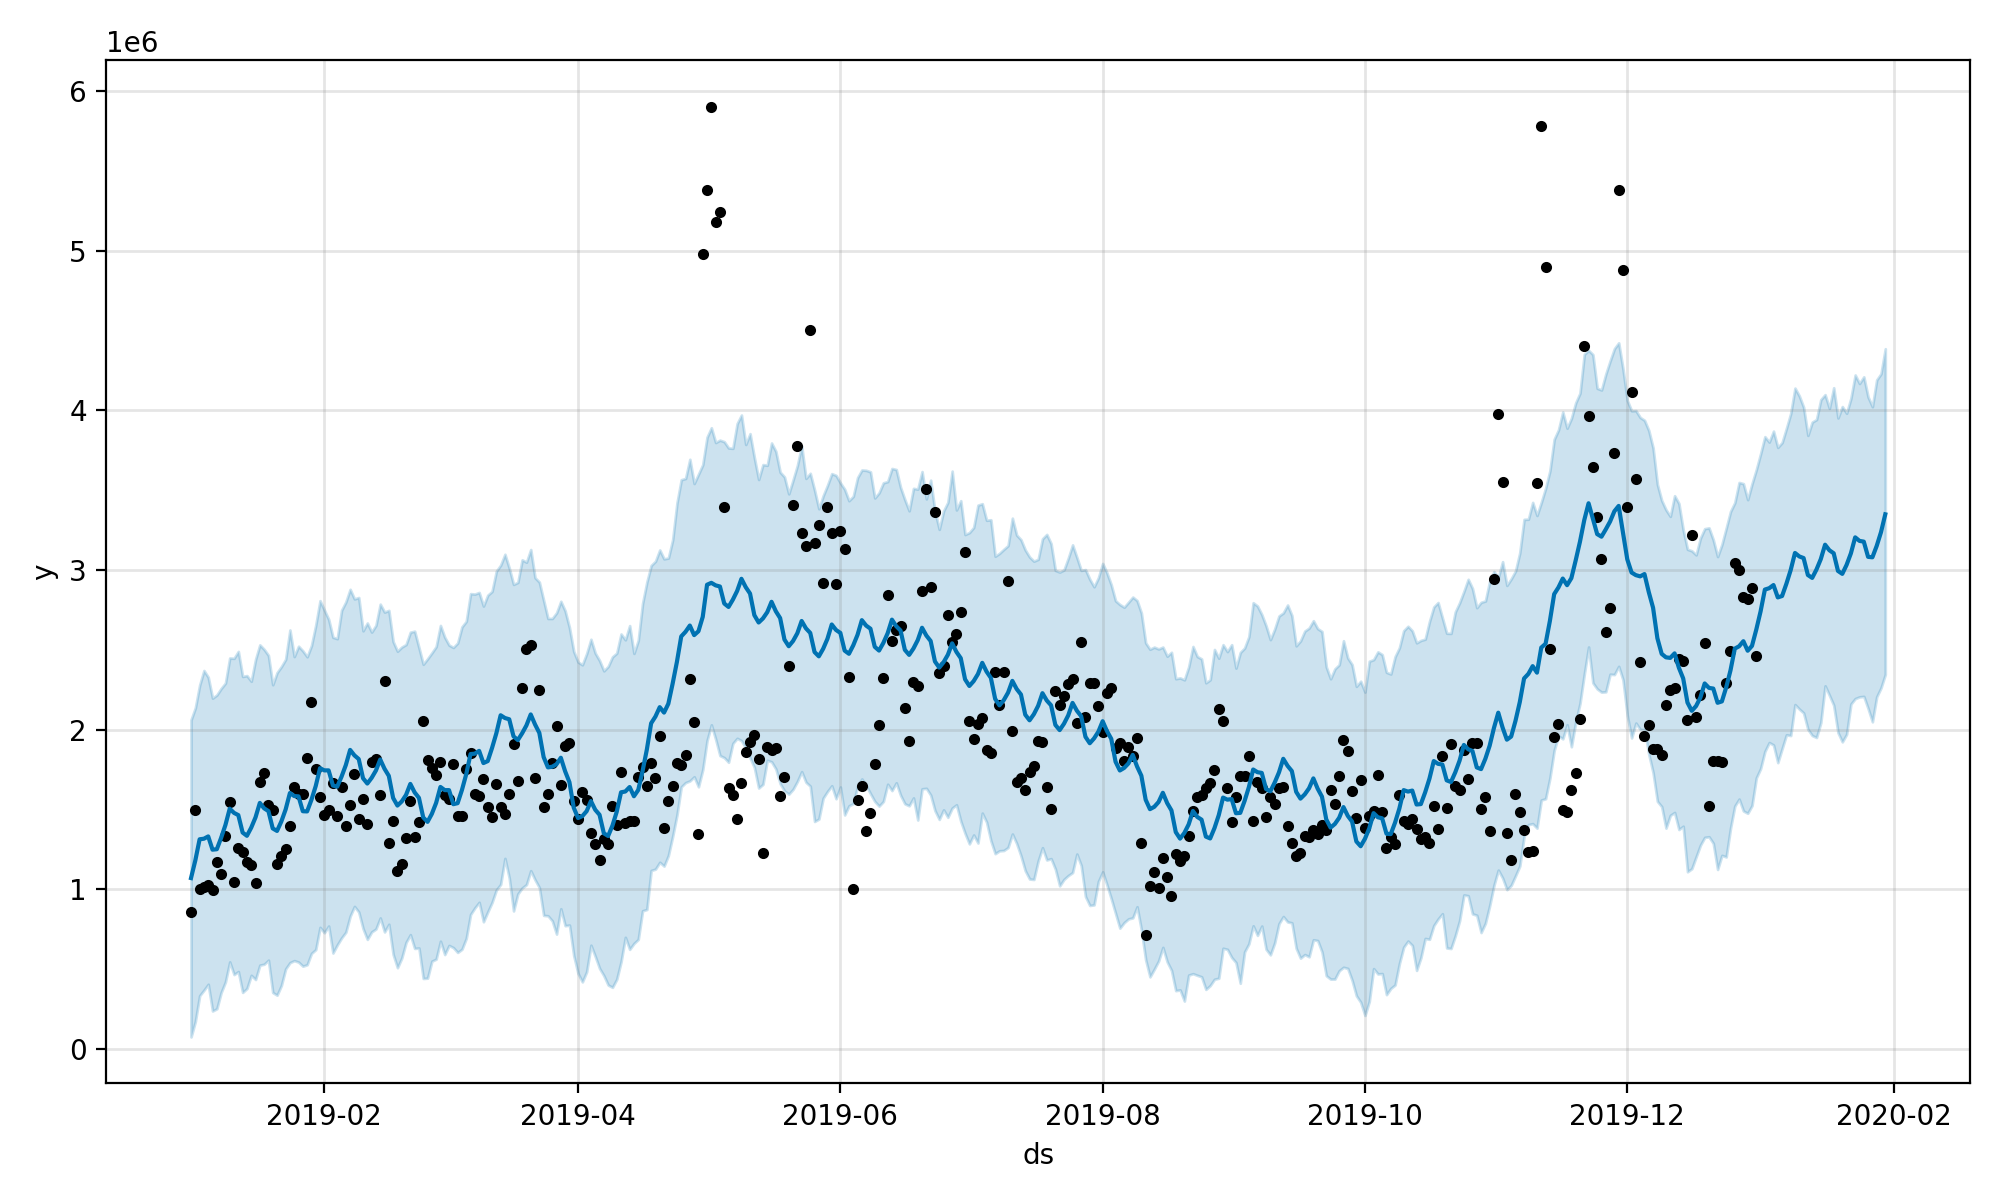

In [48]:
fig1 = forecast.plot(results)

<IPython.core.display.Javascript object>


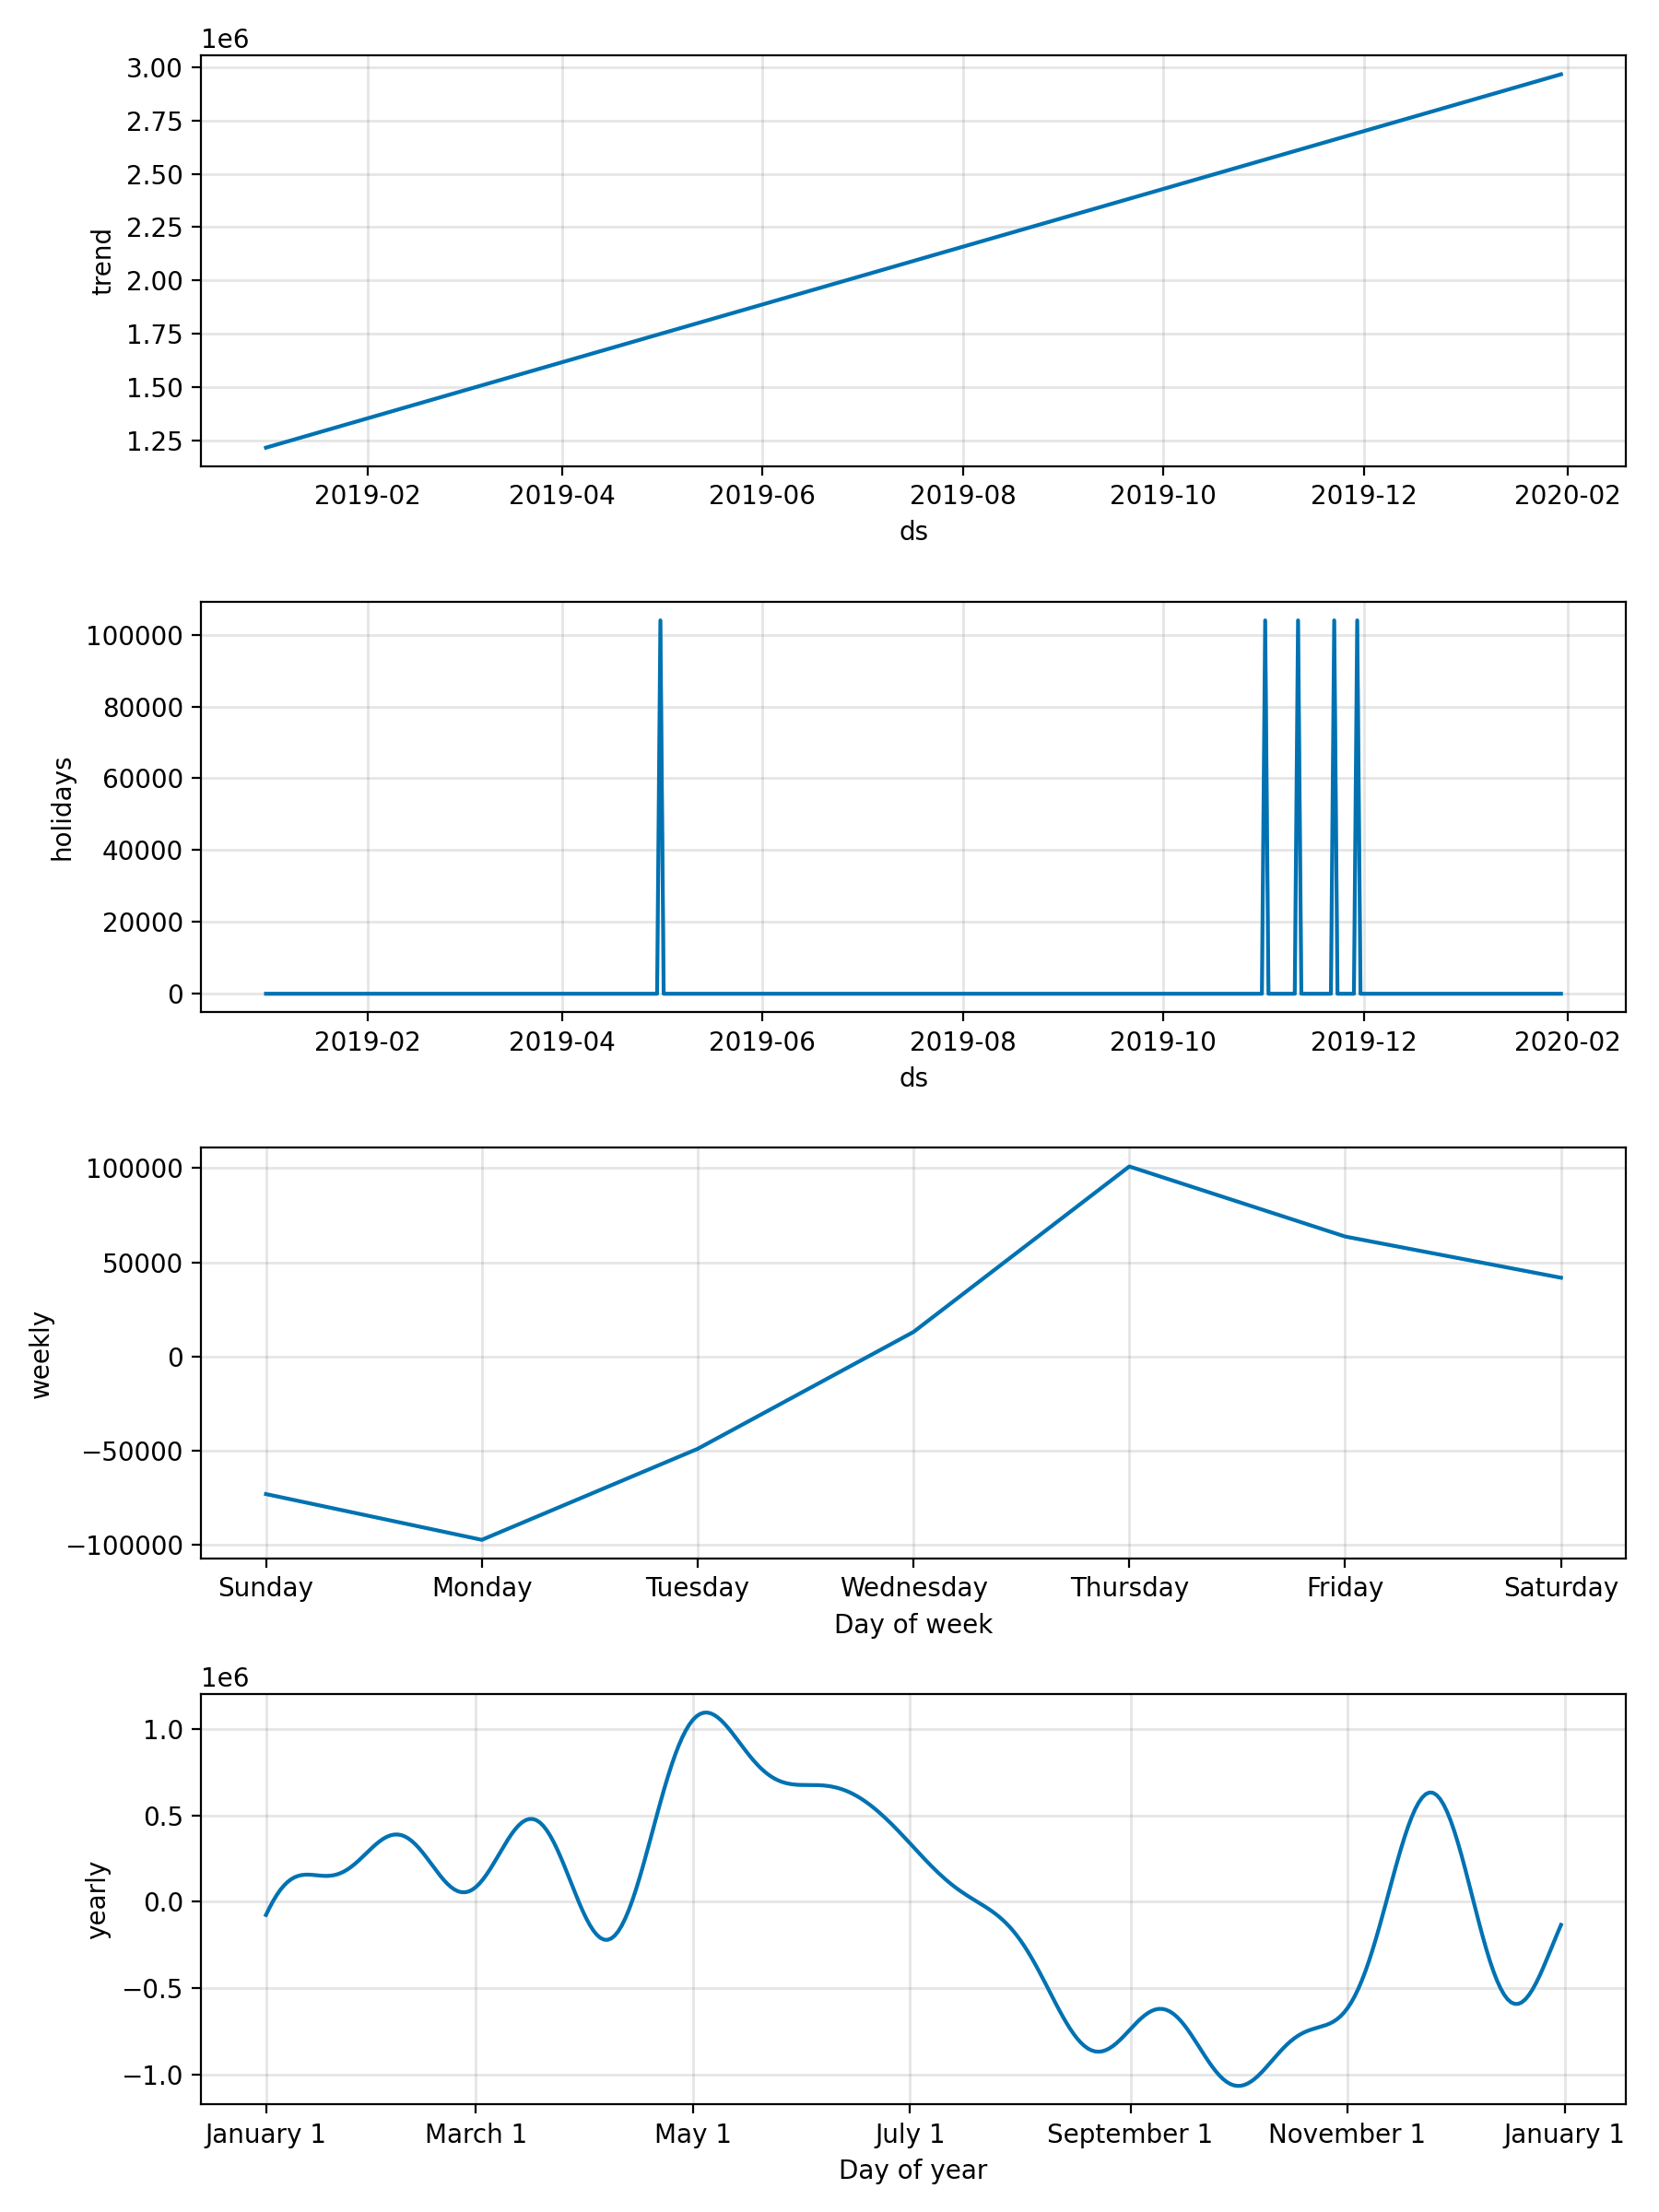

In [49]:
fig2 = forecast.plot_components(results)

In [51]:
results[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].head(30)

,ds,yhat_lower,yhat,yhat_upper
0,2019-01-01,75096.772599,1.070009e+06,2.060694e+06
1,2019-01-02,172461.162394,1.180327e+06,2.136157e+06
2,2019-01-03,333422.108777,1.312933e+06,2.277969e+06
3,2019-01-04,368042.457359,1.316438e+06,2.369906e+06
4,2019-01-05,405005.129519,1.330909e+06,2.327765e+06
5,2019-01-06,237765.283935,1.247842e+06,2.196873e+06
6,2019-01-07,251880.945755,1.250723e+06,2.216821e+06
7,2019-01-08,353192.259908,1.321724e+06,2.257574e+06
8,2019-01-09,420118.966770,1.402166e+06,2.291096e+06
9,2019-01-10,544833.684766,1.504484e+06,2.448244e+06


In [52]:
results[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].to_csv('revenue_forecast.csv')